## Get the emoji package

In [1]:
import emoji

In [2]:
emoji_dictionary = {'0': '\u2764\uFE0F',
                    '1': ':baseball:',
                    '2': ':grinning_face_with_big_eyes:',
                    '3': ':disappointed_face:',
                    '4': ':fork_and_knife:',
                    '5': ':hundred_points:',
                    '6': ':fire:',
                    '7': ':face_blowing_a_kiss:',
                    '8': ':chestnut:',
                    '9': ':flexed_biceps:'}

In [3]:
for e in emoji_dictionary.values(): 
    print(emoji.emojize(e))

❤️
⚾
😃
😞
🍴
💯
🔥
😘
🌰
💪


## Processing a Custom Dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv('train_emoji.csv', header=None)
test = pd.read_csv('test_emoji.csv', header=None)

In [6]:
train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [7]:
#Printing sentences with emojis
data = train.values
print(data.shape)

(132, 4)


In [8]:
X_train = train[0]
Y_train = train[1]

X_test = test[0]
Y_test = test[1]

In [11]:
for i in range(5):
    print(X_train[i], emoji.emojize(emoji_dictionary[str(Y_train[i])]))

never talk to me again 😞
I am proud of your achievements 😃
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


## Getting the Glove Vectors

In [15]:
f = open('glove.6B.50d.txt', encoding='utf-8')

In [16]:
embeddings_index = {}

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float')
    embeddings_index[word] = coefs
    
f.close()

In [18]:
emb_dim = embeddings_index['eat'].shape[0]
print(emb_dim)

50


## Converting sentences into vectors (Embedding Layer Output)

In [19]:
def embedding_output(X):
    maxLen = 10
    embedding_out = np.zeros((X.shape[0], maxLen, emb_dim))
    
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        
        for ij in range(len(X[ix])):
            try:
                embedding_out[ix][ij] = embeddings_index[X[ix][ij].lower()]
            except:
                embedding_out[ix][ij] = np.zeros((50,))
    
    return embedding_out

In [20]:
embeddings_matrix_train = embedding_output(X_train)
embeddings_matrix_test = embedding_output(X_test)

c:\users\chesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
print(embeddings_matrix_train.shape)
print(embeddings_matrix_test.shape)

(132, 10, 50)
(56, 10, 50)


In [23]:
from keras.utils import to_categorical

In [24]:
Y_train = to_categorical(Y_train, num_classes=5)
Y_test = to_categorical(Y_test, num_classes=5)

## Define the RNN/LSTM Model

In [34]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
model = Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10, 64)            29440     
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_8 (Activation)    (None, 5)                 0         
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
_________________________________________________________________


In [57]:
earlystop = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(embeddings_matrix_train, Y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.2, callbacks=[earlystop])

Train on 105 samples, validate on 27 samples
Epoch 1/100
105/105 [==============================] - 2s 23ms/step - loss: 1.6195 - acc: 0.2381 - val_loss: 1.6230 - val_acc: 0.1852
Epoch 2/100
105/105 [==============================] - 0s 437us/step - loss: 1.5869 - acc: 0.2857 - val_loss: 1.6214 - val_acc: 0.2222
Epoch 3/100
105/105 [==============================] - 0s 418us/step - loss: 1.5522 - acc: 0.2952 - val_loss: 1.6238 - val_acc: 0.1852
Epoch 4/100
105/105 [==============================] - 0s 446us/step - loss: 1.5201 - acc: 0.3714 - val_loss: 1.6323 - val_acc: 0.1852
Epoch 5/100
105/105 [==============================] - 0s 456us/step - loss: 1.5007 - acc: 0.4000 - val_loss: 1.6466 - val_acc: 0.2222
Epoch 6/100
105/105 [==============================] - 0s 513us/step - loss: 1.5003 - acc: 0.3714 - val_loss: 1.6591 - val_acc: 0.2222
Epoch 7/100
105/105 [==============================] - 0s 408us/step - loss: 1.4680 - acc: 0.3905 - val_loss: 1.6699 - val_acc: 0.2222
Epoch 8/100

In [58]:
pred = model.predict_classes(embeddings_matrix_test)

In [59]:
print(pred)

[4 3 2 0 2 2 1 2 4 2 1 2 0 2 1 3 2 2 3 2 0 0 4 2 3 1 2 0 4 2 0 1 0 2 0 2 2
 4 4 2 1 0 0 2 2 0 2 2 0 1 3 0 3 2 2 0]


In [60]:
model.evaluate(embeddings_matrix_test, Y_test)

56/56 [==============================] - 0s 267us/step


[1.5770921536854334, 0.6250000085149493]

## Outputting the predicted emojis

In [61]:
for i in range(30):
    print(' '.join(X_test[i]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(Y_test[i]))]))
    print(emoji.emojize(emoji_dictionary[str(pred[i])]))

I want to eat
🍴
🍴
he did not answer
😞
😞
he got a raise
😃
😃
she got me a present
❤️
❤️
ha ha ha it was so funny
😃
😃
he is a good friend
❤️
😃
I am upset
❤️
⚾
We had such a lovely dinner tonight
❤️
😃
where is the food
🍴
🍴
Stop making this joke ha ha ha
😃
😃
where is the ball
⚾
⚾
work is hard
😞
😃
This girl is messing with me
😞
❤️
are you serious ha ha
😃
😃
Let us go play baseball
⚾
⚾
This stupid grader is not working
😞
😞
work is horrible
😞
😃
Congratulation for having a baby
😃
😃
stop messing around
😞
😞
any suggestions for dinner
🍴
😃
I love taking breaks
❤️
❤️
you brighten my day
😃
❤️
I boiled rice
🍴
🍴
she is a bully
😞
😃
Why are you feeling bad
😞
😞
I am upset
😞
⚾
I worked during my birthday
😞
😃
My grandmother is the love of my life
❤️
❤️
enjoy your break
😃
🍴
valentine day is near
❤️
😃


## Plotting the confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
"""Use this method directly - """
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [69]:
cnf_matrix = confusion_matrix(np.argmax(Y_test,axis=1), pred)
print(cnf_matrix)

[[ 8  1  3  0  0]
 [ 0  3  2  0  0]
 [ 3  1 13  0  1]
 [ 3  2  4  6  0]
 [ 0  0  1  0  5]]


Confusion matrix, without normalization
[[ 8  1  3  0  0]
 [ 0  3  2  0  0]
 [ 3  1 13  0  1]
 [ 3  2  4  6  0]
 [ 0  0  1  0  5]]


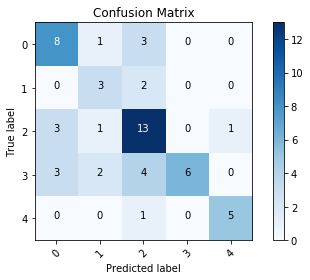

In [70]:
plot_confusion_matrix(cnf_matrix, [0,1,2,3,4], normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues)